# >>>> PERFORMING WHETHER THE CLIENT HAS SUBSCRIBED A TERM DEPOSIT OR NOT BINOMIAL ("YES" OR "NO") <<<<

#  IMPORT LIBRARIES

In [64]:
# PANDAS LIBRARIE IS USED FOR DATA MANIPULATION
import pandas as pd

# NUMPY USED FOR MATHEMATICAL OPERATION
import numpy as np 

# SEABORN IS USED FOR ADVANCED VISULIZATION 
import seaborn as sns

# MATPLOTLIB IS USED FOR VISUALIZATION PURPORSE
import matplotlib.pyplot as plt

# SKLEARN IS USED TO BUILD MACHINE LEARNING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn import  metrics
from sklearn.metrics import classification_report

# IMPORT DATA

In [65]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\bank-full.csv",sep=';')

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# DATA UNDERSTANDING

In [67]:
#gives null values present in columns
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [68]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [69]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [70]:
# dropping the columns which is not required
df.drop(['job','marital','education','default','housing','loan','contact','day','month','poutcome',
         'duration'],inplace=True,axis = 1)

In [71]:
# converting value yes/no to numeric and creating new column
df['outcome'] = df.y.replace({'yes': 1, 'no': 0})

In [72]:
df.head()

,age,balance,campaign,pdays,previous,y,outcome
0,58,2143,1,-1,0,no,0
1,44,29,1,-1,0,no,0
2,33,2,1,-1,0,no,0
3,47,1506,1,-1,0,no,0
4,33,1,1,-1,0,no,0


<AxesSubplot:>

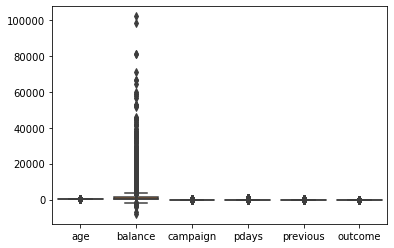

In [73]:
sns.boxplot(data =df,orient = "v")

<AxesSubplot:xlabel='age'>

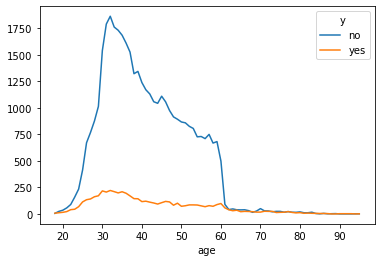

In [74]:
pd.crosstab(df.age,df.y).plot(kind="line")

<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

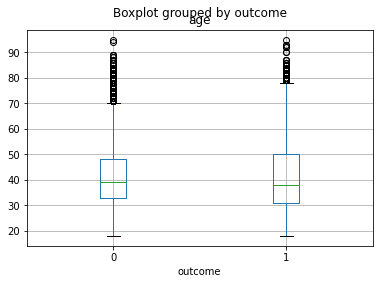

In [75]:
df.boxplot(column='age', by='outcome')

In [76]:
# Dividing our data into input variables 
X = df.iloc[:,:-2] # removing y and get all columns data
X.head()

,age,balance,campaign,pdays,previous
0,58,2143,1,-1,0
1,44,29,1,-1,0
2,33,2,1,-1,0
3,47,1506,1,-1,0
4,33,1,1,-1,0


In [77]:
# Dividing our data into output variables 
Y = df['outcome'] #get y column data
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [78]:
#Logistic regression and fit the model
classifier = LogisticRegression(solver='lbfgs', max_iter=45211)
classifier.fit(X,Y)

LogisticRegression(max_iter=45211)

In [79]:
classifier.coef_ 

array([[ 6.82519638e-03,  3.70694070e-05, -1.23768535e-01,
         1.66237606e-03,  7.27644091e-02]])

In [80]:
classifier.predict_proba (X)

array([[0.86410124, 0.13589876],
       [0.88326277, 0.11673723],
       [0.89088134, 0.10911866],
       ...,
       [0.83076468, 0.16923532],
       [0.90742468, 0.09257532],
       [0.72543558, 0.27456442]])

In [81]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
y_pred_df= pd.DataFrame({'actual_data': Y,'predicted_probality': y_pred})
y_pred_df

,actual_data,predicted_probality
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [83]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39885,    37],
       [ 5279,    10]], dtype=int64)

In [84]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.21      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.55      0.50      0.47     45211
weighted avg       0.80      0.88      0.83     45211



Text(0.5, 15.0, 'Predicted')

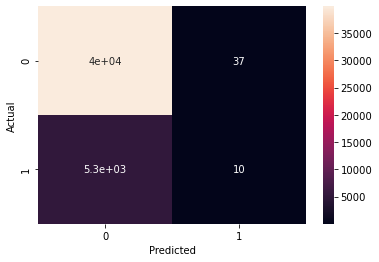

In [85]:
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [86]:
# creating sample data for prediction
new_data=pd.DataFrame({'age':[35],"balance":[5000],"campaign":[1],"pdays":[-1],"previous":[0]})
new_pred=classifier.predict(new_data)
new_pred

array([0], dtype=int64)

In [87]:
val="."
if new_pred[0] == 0 :
   print("Yes, subscribed a term deposit")
   val="yes"
else:
   print("No, not subscribed a term deposit")
   val="no"    

Yes, subscribed a term deposit


In [88]:
new_data['y']=val
new_data 

,age,balance,campaign,pdays,previous,y
0,35,5000,1,-1,0,yes
